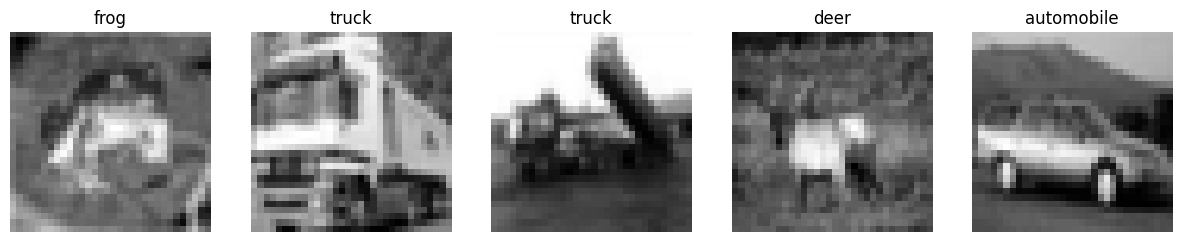

In [ ]:
# Mount Google Drive (Only if dataset is in Drive)
from google.colab import drive
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize


# Define paths
zip_file = "/content/train.zip"  # Change this to the correct ZIP file path
extract_folder = "/content/trainimages"  # Folder where images will be extracted
csv_file = "/content/trainLabels.csv"  # Change if needed

# Step 1: Extract ZIP file
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_file, 'r') as archive:
    archive.extractall(extract_folder)

# Step 2: Load the dataset
df = pd.read_csv(csv_file)

# Step 3: Define the image folder
image_folder = "/content/trainimages/train" # This is the folder where images are extracted

# Function to load and preprocess images
def load_image(image_id, img_size=(32, 32)):
    img_path = os.path.join(image_folder, f"{image_id}.png")  # Assuming images are PNG
    if os.path.exists(img_path):
        img = imread(img_path)
        img_resized = resize(img, img_size)  # Resize image
        img_gray = rgb2gray(img_resized)  # Convert to grayscale (optional)
        return img_gray
    else:
        print(f"Image {image_id}.png not found!")
        return None

# Step 4: Load and display sample images
sample_ids = df["id"][:5]  # Load first 5 images
sample_labels = df["label"][:5]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, image_id in enumerate(sample_ids):
    img = load_image(image_id)
    if img is not None:
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(sample_labels.iloc[i])
        axes[i].axis("off")

plt.show()


In [ ]:
import os
print("Extracted files:", os.listdir("/content/trainimages/train")[:10])  # Show first 10 files


Extracted files: ['44461.png', '22459.png', '26099.png', '16213.png', '23259.png', '32277.png', '10481.png', '629.png', '45873.png', '26076.png']


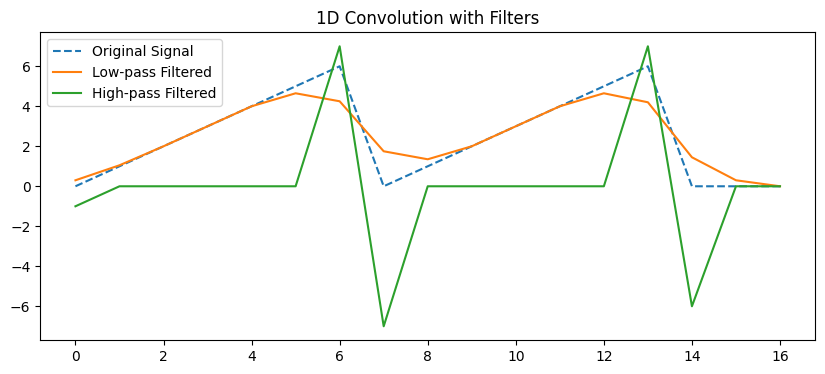

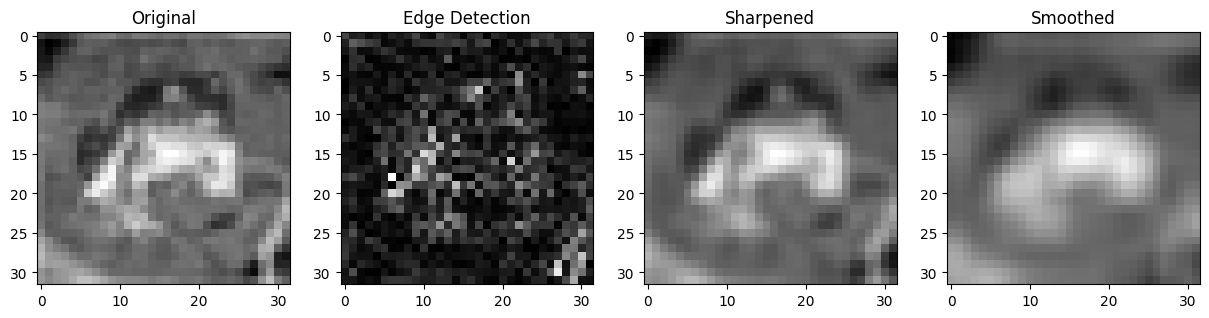

<ipython-input-3-4e02ed1a033b>:104: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  y_data = np.array(pd.factorize(y_data)[0])  # Convert labels to numeric
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2178 - loss: 2.1253 - val_accuracy: 0.3095 - val_loss: 1.9385
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3089 - loss: 1.9120 - val_accuracy: 0.3236 - val_loss: 1.8918
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3399 - loss: 1.8502 - val_accuracy: 0.3367 - val_loss: 1.8631
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3559 - loss: 1.8123 - val_accuracy: 0.3413 - val_loss: 1.8521
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3630 - loss: 1.7797 - val_accuracy: 0.3473 - val_loss: 1.8210
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3726 - loss: 1.7550 - val_accuracy: 0.3620 - val_loss: 1.7914
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3860 - loss: 1.7367 - val_accuracy: 0.3664 - val_loss: 1.7811
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3917 - loss: 1.720

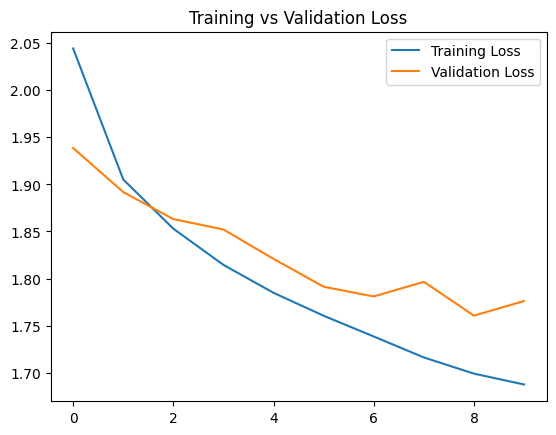

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


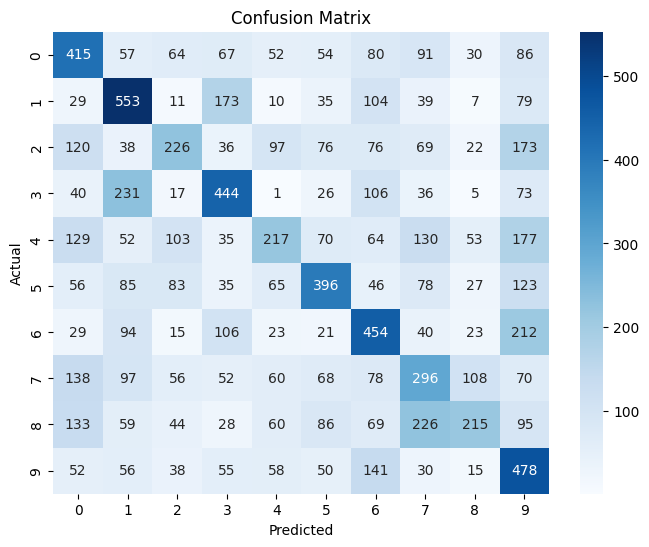

In [ ]:
# Mount Google Drive (Only if dataset is in Drive)
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from scipy import signal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import zipfile

# === Step 1: Mount Drive & Extract ZIP File ===


# Paths (Update If Needed)
zip_file = "/content/train.zip"  # Change this to the correct ZIP file path
extract_folder = "/content/trainimages"  # Folder where images will be extracted
csv_file = "/content/trainLabels.csv"  # Change if needed

# Extract ZIP File
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_file, 'r') as archive:
    archive.extractall(extract_folder)

# === Step 2: Load the Dataset ===
df = pd.read_csv(csv_file)

# Define the image folder
image_folder = "/content/trainimages/train" # This is the folder where images are extracted

# === Step 3: Define a Function to Load & Preprocess Images ===
def load_image(image_id, img_size=(32, 32)):
    img_path = os.path.join(image_folder, f"{image_id}.png")  # Assuming PNG format
    if os.path.exists(img_path):
        img = imread(img_path)
        img_resized = resize(img, img_size)  # Resize to 32x32
        img_gray = rgb2gray(img_resized)  # Convert to grayscale
        return img_gray
    else:
        print(f"Image {image_id}.png not found!")
        return None

# === Step 4: Convolution on 1D Signal (A1) ===
X = [0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,0,0]
H_L = [0.05, 0.2, 0.5, 0.2, 0.05]  # Low-pass filter
H_H = [-1, 2, -1]  # High-pass filter

y_low = np.convolve(X, H_L, mode='same')
y_high = np.convolve(X, H_H, mode='same')

plt.figure(figsize=(10,4))
plt.plot(X, label="Original Signal", linestyle="dashed")
plt.plot(y_low, label="Low-pass Filtered")
plt.plot(y_high, label="High-pass Filtered")
plt.legend()
plt.title("1D Convolution with Filters")
plt.show()

# === Step 5: Convolution on Images (A2) ===
sample_id = df["id"][0]  # Load the first image
img = load_image(sample_id)

# Define filters
fil1 = np.array([[ 0, -1,  0], [-1, 4, -1], [ 0, -1,  0]])  # Edge detection
fil2 = np.array([[ 0.2, 0.5,  0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])  # Sharpen
fil3 = np.ones((5,5)) / 25  # Smoothing

# Apply filters
grad1 = signal.convolve2d(img, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img, fil3, boundary='symm', mode='same')

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(img, cmap="gray"); axes[0].set_title("Original")
axes[1].imshow(abs(grad1), cmap="gray"); axes[1].set_title("Edge Detection")
axes[2].imshow(grad2, cmap="gray"); axes[2].set_title("Sharpened")
axes[3].imshow(grad3, cmap="gray"); axes[3].set_title("Smoothed")
plt.show()

# === Step 6: Load & Preprocess Images for Neural Network (A3-A5) ===
image_size = (32, 32)
X_data = []
y_data = []

for index, row in df.iterrows():
    img = load_image(row["id"])
    if img is not None:
        X_data.append(img)
        y_data.append(row["label"])

# Convert to NumPy arrays
X_data = np.array(X_data).reshape(len(X_data), 32, 32, 1)  # Add channel dimension
y_data = np.array(pd.factorize(y_data)[0])  # Convert labels to numeric

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# One-Hot Encoding Labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# === Step 7: Design & Train a Neural Network (A3) ===
model = Sequential([
    Flatten(input_shape=(32, 32, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# === Step 8: Plot Training & Validation Loss (A4) ===
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# === Step 9: Evaluate the Model & Show Confusion Matrix (A5) ===
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 21.8 MB/s eta 0:00:00


<ipython-input-7-5234592e0bfd>:64: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  y_data = np.array(pd.factorize(y_data)[0])  # Convert labels to numbers
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 49ms/step - accuracy: 0.2899 - loss: 1.9462 - val_accuracy: 0.4811 - val_loss: 1.4975
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.4975 - loss: 1.4346 - val_accuracy: 0.5289 - val_loss: 1.3418
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.5565 - loss: 1.2714 - val_accuracy: 0.5695 - val_loss: 1.2373
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 50ms/step - accuracy: 0.5909 - loss: 1.1813 - val_accuracy: 0.5851 - val_loss: 1.1810
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.6142 - loss: 1.1126 - val_accuracy: 0.6017 - val_loss: 1.1658
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.6332 - loss: 1.0626 - val_accuracy: 0.6145 - val_loss: 1.1174
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.6523 - loss: 1.0058 - val_accuracy: 0.6132 - val_loss: 1.1198
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6688 -

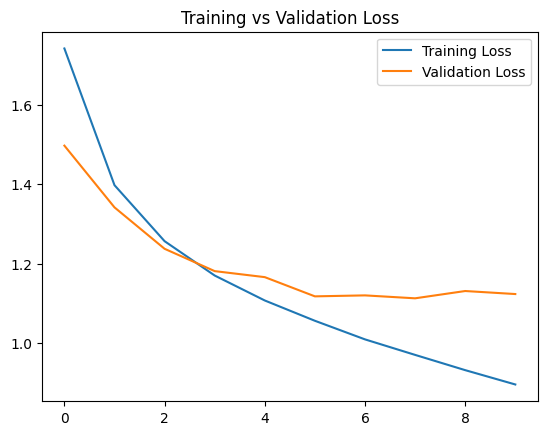

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6150 - loss: 1.1115

CNN Model Accuracy: 0.6164000034332275


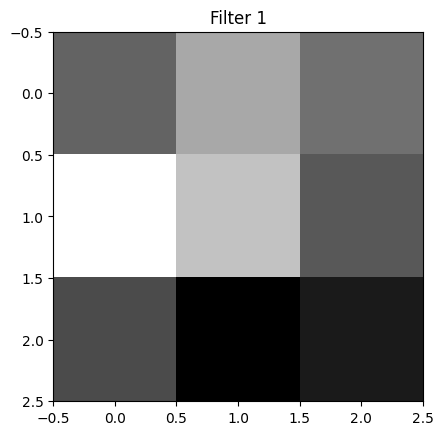

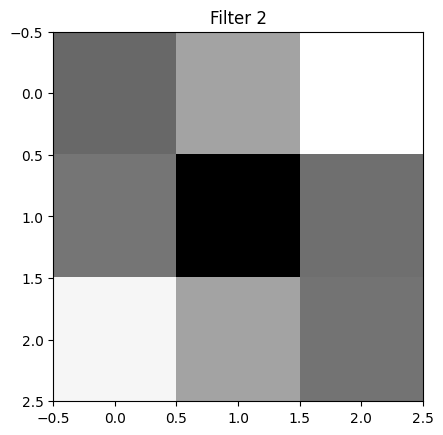

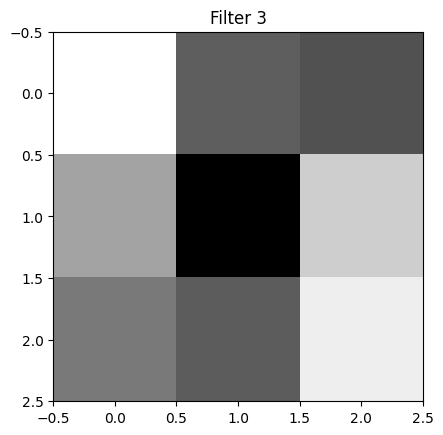

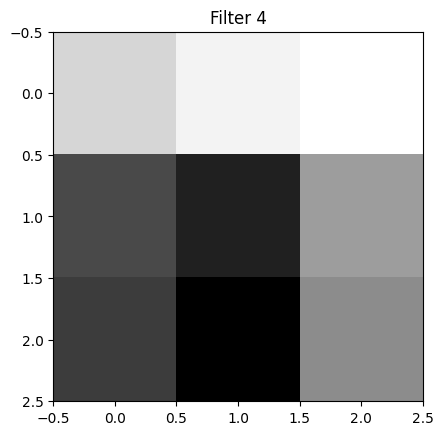

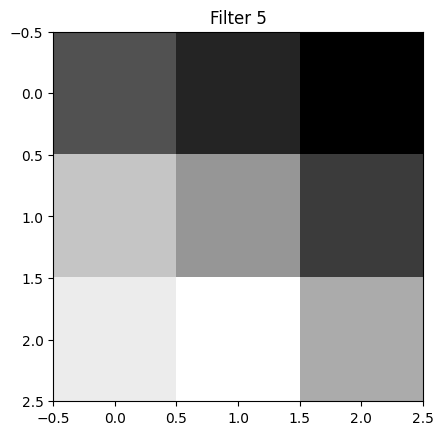

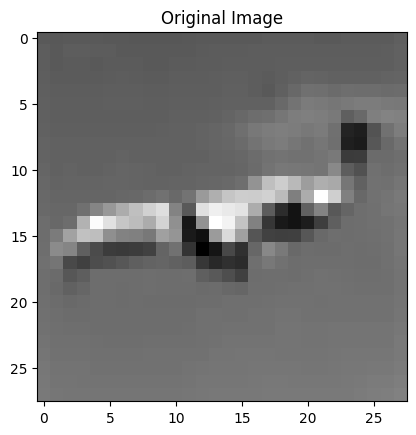

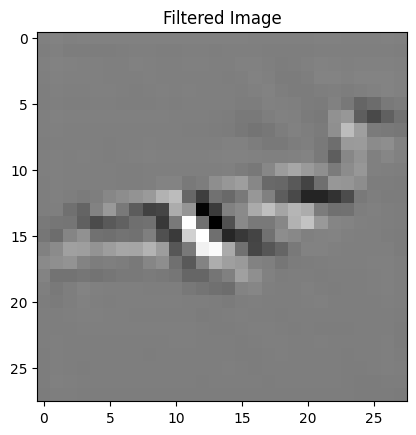

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2161 - loss: 2.1313 - val_accuracy: 0.2988 - val_loss: 1.9662
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3049 - loss: 1.9357 - val_accuracy: 0.3096 - val_loss: 1.9149
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3359 - loss: 1.8626 - val_accuracy: 0.3312 - val_loss: 1.8761
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3490 - loss: 1.8180 - val_accuracy: 0.3552 - val_loss: 1.8230
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3638 - loss: 1.7782 - val_accuracy: 0.3643 - val_loss: 1.7944
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3736 - loss: 1.7646 - val_accuracy: 0.3618 - val_loss: 1.7988
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3766 - loss: 1.7483 - val_accuracy: 0.3747 - val_loss: 1.7706
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3883 - loss: 1.7219 -

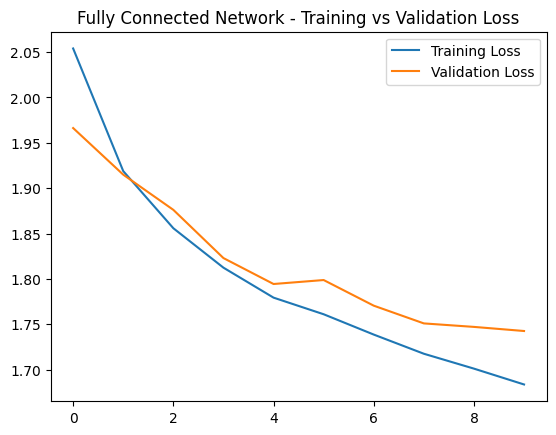

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3827 - loss: 1.7399

Fully Connected Network Accuracy: 0.3831000030040741


In [ ]:



from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy import signal
import seaborn as sns
from sklearn.metrics import confusion_matrix
import zipfile





zip_file = "/content/train.zip"
extract_folder = "/content/trainimages"
csv_file = "/content/trainLabels.csv"


if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_file, 'r') as archive:
    archive.extractall(extract_folder)


image_folder = "/content/trainimages/train" # Update based on extracted structure


df = pd.read_csv(csv_file)


def load_image(image_id, img_size=(28, 28)):
    img_path = os.path.join(image_folder, f"{image_id}.png")  # Assuming PNG format
    if os.path.exists(img_path):
        img = imread(img_path)
        img_resized = resize(img, img_size)  # Resize to 28x28
        img_gray = rgb2gray(img_resized)  # Convert to grayscale
        return img_gray
    else:
        print(f"Image {image_id}.png not found!")
        return None


X_data = []
y_data = []

for index, row in df.iterrows():
    img = load_image(row["id"])
    if img is not None:
        X_data.append(img)
        y_data.append(row["label"])


X_data = np.array(X_data).reshape(len(X_data), 28, 28, 1)  # Add channel dimension
y_data = np.array(pd.factorize(y_data)[0])  # Convert labels to numbers


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


model = Sequential([
    Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


score = model.evaluate(X_test, y_test, verbose=1)
print('\nCNN Model Accuracy:', score[1])


filters, biases = model.layers[0].get_weights()


for i in range(5):
    plt.imshow(filters[:,:,0,i], cmap='gray')
    plt.title(f"Filter {i+1}")
    plt.show()


sample_image = X_train[10].reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title("Original Image")
plt.show()


filtered_image = signal.convolve2d(sample_image, filters[:,:,0,1].reshape(3,3), boundary='symm', mode='same')
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.show()


fc_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

fc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fc_history = fc_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Fully Connected Network - Training vs Validation Loss")
plt.show()


fc_score = fc_model.evaluate(X_test, y_test, verbose=1)
print('\nFully Connected Network Accuracy:', fc_score[1])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB
None
Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64
f199
0.000000      1687
260.141602       2
373.327911       2
56.989830        1
50.476765        1
              ... 
219.147095       1
294.902954       1
295.790802       1
235.241730       1
408.525330       1
Name: count, Length: 1565, dtype: int64


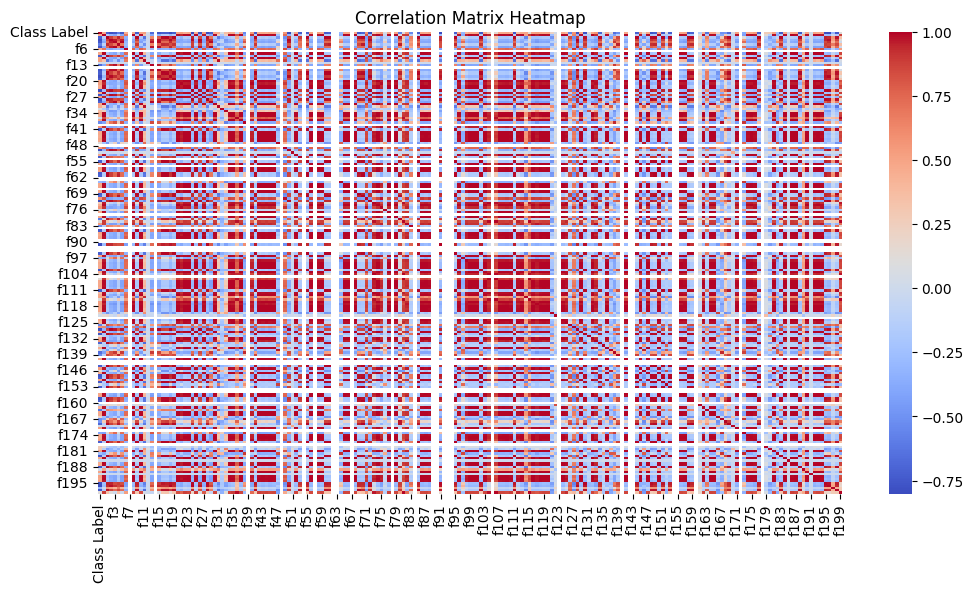

Rank of feature matrix: 174
      Classifier  Accuracy  Precision    Recall  F1-Score     AUROC  \
0            kNN  0.928747   0.930303  0.928747  0.928758  0.967276   
1  Decision Tree  0.916462   0.917132  0.916462  0.916619  0.934549   
2            SVM  0.923833   0.927711  0.923833  0.924002  0.980081   
3  Random Forest  0.938575   0.940491  0.938575  0.938639  0.984580   
4    Naïve Bayes  0.927518   0.928973  0.927518  0.927625  0.964958   

   Train Time  Test Time  
0    0.001282   0.065702  
1    0.175394   0.000675  
2    0.489537   0.044854  
3    0.849344   0.010801  
4    0.003632   0.001123  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time

# Load dataset
file_path = "/content/Custom_CNN_Features.csv"
df = pd.read_csv(file_path)

# Exploratory Data Analysis
print(df.info())  # Data types of attributes
print(df.isnull().sum())  # Check for missing values

# Drop the 'Filename' column as it's not needed for classification
df.drop(columns=['Filename'], inplace=True)

# Ensure only numeric columns are considered for missing value imputation
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Continue with further processing...

# Check class balance
print(df.iloc[:, -1].value_counts())

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Matrix rank study
print(f"Rank of feature matrix: {np.linalg.matrix_rank(df.iloc[:, :-1].values)}")

# Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1].values)
y = df.iloc[:, -1].values

# Ensure 'Class Label' is categorical
df['Class Label'] = df['Class Label'].astype('category').cat.codes

# Extract features (X) and labels (y)
X = df.drop(columns=['Class Label']).values  # Features
y = df['Class Label'].values  # Target variable (now categorical)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Classifier list
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naïve Bayes": GaussianNB()
}


# Model evaluation
results = []
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = clf.predict(X_test)
    test_time = time.time() - start_time

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

    results.append([name, acc, prec, rec, f1, auc, train_time, test_time])

# Display results
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "Train Time", "Test Time"])
print(results_df)

# Save results to CSV for report
results_df.to_csv("/content/results.csv", index=False)


In [1]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import zipfile

# Unzipping the dataset
zip_file = "/content/train.zip"
extract_folder = "/content/trainimages"
csv_file = "/content/trainLabels.csv"

if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_file, 'r') as archive:
    archive.extractall(extract_folder)

image_folder = "/content/trainimages/train"

df = pd.read_csv(csv_file)

# Function to load and preprocess images
def load_image(image_id, img_size=(28, 28)):
    img_path = os.path.join(image_folder, f"{image_id}.png")
    if os.path.exists(img_path):
        img = imread(img_path)
        img_resized = resize(img, img_size)
        img_gray = rgb2gray(img_resized)
        return img_gray
    else:
        print(f"Image {image_id}.png not found!")
        return None

X_data, y_data = [], []
for index, row in df.iterrows():
    img = load_image(row["id"])
    if img is not None:
        X_data.append(img)
        y_data.append(row["label"])

X_data = np.array(X_data).reshape(len(X_data), 28, 28, 1)  # Add channel dimension
y_data = np.array(pd.factorize(y_data)[0])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# CNN Model
def create_cnn():
    model = Sequential([
        Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_cnn()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)



<ipython-input-1-a338dcadb032>:54: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  y_data = np.array(pd.factorize(y_data)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.3000 - loss: 1.9187 - val_accuracy: 0.4873 - val_loss: 1.4616
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.4995 - loss: 1.4282 - val_accuracy: 0.5362 - val_loss: 1.3248
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.5616 - loss: 1.2641 - val_accuracy: 0.5752 - val_loss: 1.2121
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 119s 60ms/step - accuracy: 0.5912 - loss: 1.1768 - val_accuracy: 0.5742 - val_loss: 1.2052
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.6241 - loss: 1.0904 - val_accuracy: 0.5872 - val_loss: 1.1909
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.6443 - loss: 1.0263 - val_accuracy: 0.6132 - val_loss: 1.1184
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 63ms/step - accuracy: 0.6572 - loss: 0.9894 - val_accuracy: 0.6220 - val_loss: 1.1053
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.6788 

AttributeError: The layer sequential has never been called and thus has no defined input.

In [7]:
from tensorflow.keras.models import Model

# ✅ Ensure the model is built by running a forward pass
dummy_input = np.zeros((1, 28, 28, 1))
_ = model.predict(dummy_input)  # Ensures model has a defined input/output

# ✅ Extract features from the last hidden layer before classification
feature_extractor = Model(inputs=model.inputs, outputs=model.get_layer("dense1").output)

# ✅ Generate feature vectors for training and testing sets
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

print("Feature extraction completed! Feature shape:", X_train_features.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
   1/1250 ━━━━━━━━━━━━━━━━━━━━ 5:11 249ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(32, 28, 28, 1))
  warnings.warn(msg)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(None, 28, 28, 1))
  warnings.warn(msg)


Feature extraction completed! Feature shape: (40000, 64)


In [8]:
# Classifier using extracted features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_features, y_train)
y_pred = clf.predict(X_test_features)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred))

# Using SVM for classification
svm = SVC(kernel='linear')
svm.fit(X_train_features, y_train)
y_pred_svm = svm.predict(X_test_features)
print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred_svm))

Random Forest Classifier Accuracy: 0.3361
SVM Classifier Accuracy: 0.2727


In [10]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import zipfile

# Unzipping the dataset
zip_file = "/content/train.zip"
extract_folder = "/content/trainimages"
csv_file = "/content/trainLabels.csv"

if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_file, 'r') as archive:
    archive.extractall(extract_folder)

image_folder = "/content/trainimages/train"

df = pd.read_csv(csv_file)

# Function to load and preprocess images
def load_image(image_id, img_size=(28, 28)):
    img_path = os.path.join(image_folder, f"{image_id}.png")
    if os.path.exists(img_path):
        img = imread(img_path)
        img_resized = resize(img, img_size)
        img_gray = rgb2gray(img_resized)
        return img_gray
    else:
        print(f"Image {image_id}.png not found!")
        return None

X_data, y_data = [], []
for index, row in df.iterrows():
    img = load_image(row["id"])
    if img is not None:
        X_data.append(img)
        y_data.append(row["label"])

X_data = np.array(X_data).reshape(len(X_data), 28, 28, 1)  # Add channel dimension
y_data = np.array(pd.factorize(y_data)[0])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# CNN Model with Regularization
def create_cnn():
    model = Sequential([
        Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_cnn()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)




<ipython-input-10-e95c4e89a2bb>:54: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  y_data = np.array(pd.factorize(y_data)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 87ms/step - accuracy: 0.2036 - loss: 2.2371 - val_accuracy: 0.2488 - val_loss: 2.5361
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 91ms/step - accuracy: 0.3484 - loss: 1.7795 - val_accuracy: 0.4122 - val_loss: 1.7034
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.4181 - loss: 1.6186 - val_accuracy: 0.4972 - val_loss: 1.4066
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 112s 89ms/step - accuracy: 0.4623 - loss: 1.5151 - val_accuracy: 0.5391 - val_loss: 1.3285
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 86ms/step - accuracy: 0.4942 - loss: 1.4349 - val_accuracy: 0.5852 - val_loss: 1.1789
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 87ms/step - accuracy: 0.5191 - loss: 1.3669 - val_accuracy: 0.5200 - val_loss: 1.4376
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.5337 - loss: 1.3442 - val_accuracy: 0.5772 - val_loss: 1.2836
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 

conv2d_4
batch_normalization_2
max_pooling2d_4
dropout_3
conv2d_5
batch_normalization_3
max_pooling2d_5
dropout_4
flatten_2
dense_4
dropout_5
dense_5
   1/1250 ━━━━━━━━━━━━━━━━━━━━ 4:07 198ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_44']
Received: inputs=Tensor(shape=(32, 28, 28, 1))
  warnings.warn(msg)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_44']
Received: inputs=Tensor(shape=(None, 28, 28, 1))
  warnings.warn(msg)


Feature extraction completed! Feature shape: (40000, 64)
Random Forest Classifier Accuracy: 0.6387
SVM Classifier Accuracy: 0.6389


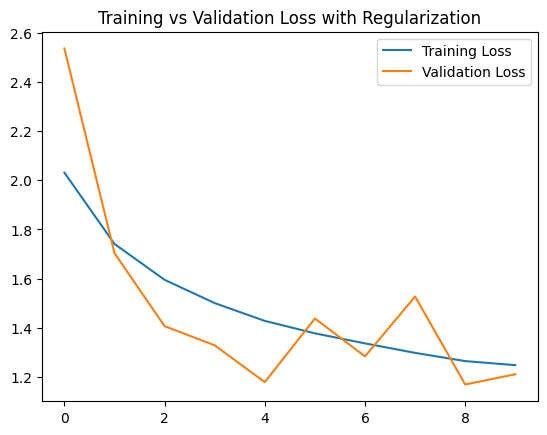

In [13]:

# Print all layer names to find the correct one
for layer in model.layers:
    print(layer.name)

# Use the correct layer name before the final Dense layer
feature_extractor = Model(inputs=model.inputs, outputs=model.get_layer("dense_4").output)  # Change "dense_4" if needed

# Extract features
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

print("Feature extraction completed! Feature shape:", X_train_features.shape)

# Classifier using extracted features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_features, y_train)
y_pred = clf.predict(X_test_features)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred))

# Using SVM for classification
svm = SVC(kernel='linear')
svm.fit(X_train_features, y_train)
y_pred_svm = svm.predict(X_test_features)
print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred_svm))

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss with Regularization")
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf

# ✅ Evaluate the model on test data
score = model.evaluate(X_test, y_test, verbose=1)
print('\n✅ Regularized CNN Model Loss:', score[0])
print('✅ Regularized CNN Model Accuracy:', score[1])

# ✅ Predict class probabilities
y_pred_probs = model.predict(X_test)

# ✅ Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# ✅ Ensure `y_test` is properly formatted
if len(y_test.shape) == 1:  # If already categorical
    y_true = y_test
else:  # If one-hot encoded, convert back to class labels
    y_true = np.argmax(y_test, axis=1)

# ✅ Generate classification report
num_classes = len(np.unique(y_true))  # Get actual number of classes
report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)])

# ✅ Print results
print("\n✅ Classification Report:\n", report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5638 - loss: 1.2108

✅ Regularized CNN Model Loss: 1.210710883140564
✅ Regularized CNN Model Accuracy: 0.5712000131607056
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.58      0.69       996
           1       0.87      0.58      0.70      1040
           2       0.63      0.27      0.38       933
           3       0.70      0.81      0.75       979
           4       0.44      0.43      0.43      1030
           5       0.72      0.62      0.67       994
           6       0.81      0.59      0.68      1017
           7       0.34      0.27      0.30      1023
           8       0.38      0.74      0.50      1015
           9       0.47      0.82      0.60       973

    accuracy                           0.57     10000
   macro avg       0.62      0.57      0.57     10000
weighted avg       0.62      0.57      0.57     1

PART-2

In [ ]:
import pandas as pd

# File path
file_path = "/content/word_embeddings_dataframe.pkl"

# Load the DataFrame
df = pd.read_pickle(file_path)

# Display the first few rows
print(df.head())

  File_Name                                               Text  \
0     10017  The balcony juts out on the south side, with t...   
1     10042  The balcony is in the southeastern corner of t...   
2     10045  bathroom is in north side of the house, next t...   
3     10047  The balcony is in the north east corner, just ...   
4     10052  The balcony is on the southwest side of the ap...   

                     Image_Path  \
0  ../floorplan_image\10017.png   
1  ../floorplan_image\10042.png   
2  ../floorplan_image\10045.png   
3  ../floorplan_image\10047.png   
4  ../floorplan_image\10052.png   

                                     BERT_Embeddings  
0  [[-0.6216691, -0.029034398, 0.045137372, -0.09...  
1  [[-0.6944888, 0.015425202, -0.0041255075, -0.1...  
2  [[-0.6030773, -0.0011889015, 0.045667697, -0.1...  
3  [[-0.69215715, -0.052971497, 0.03891414, -0.02...  
4  [[-0.61126614, -0.005761562, -0.054692637, 0.0...  


In [ ]:
import pandas as pd

# File paths
pkl_file = "/content/word_embeddings_dataframe.pkl"
csv_file = "/content/word_embeddings_dataframe.csv"

# Load the DataFrame
df = pd.read_pickle(pkl_file)

# Save as CSV
df.to_csv(csv_file, index=False)

print(f"CSV file saved at: {csv_file}")

CSV file saved at: /content/word_embeddings_dataframe.csv


<ipython-input-6-ade54538bca8>:68: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  y_data = np.array(pd.factorize(y_data)[0])  # Convert labels to numbers
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 53ms/step - accuracy: 0.2982 - loss: 1.9273 - val_accuracy: 0.4664 - val_loss: 1.4998
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4966 - loss: 1.4291 - val_accuracy: 0.5158 - val_loss: 1.3696
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.5573 - loss: 1.2702 - val_accuracy: 0.5684 - val_loss: 1.2304
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 51ms/step - accuracy: 0.5931 - loss: 1.1799 - val_accuracy: 0.5812 - val_loss: 1.2195
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.6126 - loss: 1.1157 - val_accuracy: 0.5965 - val_loss: 1.1560
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 51ms/step - accuracy: 0.6384 - loss: 1.0588 - val_accuracy: 0.5882 - val_loss: 1.1754
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.6511 - loss: 1.0093 - val_accuracy: 0.6076 - val_loss: 1.1386
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.6666 -

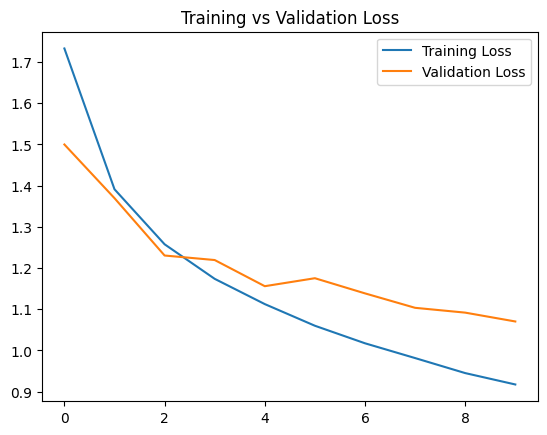

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6183 - loss: 1.0757

CNN Model Accuracy: 0.6230999827384949


AttributeError: The layer sequential_4 has never been called and thus has no defined input.

In [ ]:
# === Step 1: Import Libraries ===
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy import signal
import seaborn as sns
from sklearn.metrics import confusion_matrix
import zipfile
import shutil

# === Step 2: Mount Google Drive (if needed) ===
# Paths (Update If Needed)
zip_file = "/content/train.zip"  # Change this to the correct ZIP file path
extract_folder = "/content/trainimages"  # Folder where images will be extracted
csv_file = "/content/trainLabels.csv"  # Change if needed

# Extract ZIP File (Fixed: Handles non-ZIP formats)
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

try:
    with zipfile.ZipFile(zip_file, 'r') as archive:
        archive.extractall(extract_folder)
except zipfile.BadZipFile:
    print("Error: The file is not a valid ZIP file. Trying alternative extraction...")
    shutil.unpack_archive(zip_file, extract_folder)

# Define the image folder
image_folder = "/content/trainimages/train"  # Update based on extracted structure

# === Step 3: Load Dataset ===
df = pd.read_csv(csv_file)

# Function to load images
def load_image(image_id, img_size=(28, 28)):
    img_path = os.path.join(image_folder, f"{image_id}.png")  # Assuming PNG format
    if os.path.exists(img_path):
        img = imread(img_path)
        img_resized = resize(img, img_size)  # Resize to 28x28
        img_gray = rgb2gray(img_resized)  # Convert to grayscale
        return img_gray
    else:
        print(f"Image {image_id}.png not found!")
        return None

# === Step 4: Preprocess Data ===
X_data = []
y_data = []

for index, row in df.iterrows():
    img = load_image(row["id"])
    if img is not None:
        X_data.append(img)
        y_data.append(row["label"])

# Convert to NumPy arrays
X_data = np.array(X_data).reshape(len(X_data), 28, 28, 1)  # Add channel dimension
y_data = np.array(pd.factorize(y_data)[0])  # Convert labels to numbers

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# One-Hot Encoding Labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# === Step 5: Design CNN Model (A1) ===
model = Sequential([
    Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu', name="conv1"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu', name="conv2"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, 28, 28, 1))  # Ensure model is built

model.summary()

# === Step 6: Train CNN Model (A2) ===
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# === Step 7: Plot Training & Validation Loss (A3) ===
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# === Step 8: Evaluate Model Accuracy (A4) ===
score = model.evaluate(X_test, y_test, verbose=1)
print('\nCNN Model Accuracy:', score[1])

# === Step 9: Feature Map Visualization (A1) ===
# Select an image from the test set
sample_image = X_test[0].reshape(1, 28, 28, 1)

# Ensure the model is built and initialized by calling it on a sample input
# This line is added to fix the error
_ = model(sample_image)

# Create a model that outputs feature maps from each convolutional layer
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps for the selected image
feature_maps = feature_map_model.predict(sample_image)

# Plot feature maps for each convolutional layer
for layer_idx, feature_map in enumerate(feature_maps):
    num_filters = feature_map.shape[-1]  # Number of feature maps (filters)

    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Feature Maps - Layer {layer_idx+1}", fontsize=14)

    for i in range(min(num_filters, 6)):  # Show up to 6 feature maps
        plt.subplot(1, 6, i+1)
        plt.imshow(feature_map[0, :, :, i], cmap='gray')
        plt.axis('off')
        plt.title(f"Filter {i+1}")

    plt.show()

# === Step 10: Design & Train Fully Connected Model (A7) ===
fc_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

fc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fc_history = fc_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# === Step 11: Plot Training vs Validation Loss (A8) ===
plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Fully Connected Network - Training vs Validation Loss")
plt.show()

# === Step 12: Test & Evaluate Fully Connected Model (A8) ===
fc_score = fc_model.evaluate(X_test, y_test, verbose=1)
print('\nFully Connected Network Accuracy:', fc_score[1])


# New Section